<a href="https://colab.research.google.com/github/JJay1010/sw-team_project/blob/main/%ED%99%A9%ED%98%84%ED%83%9C/train.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# load numpy

In [26]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
train_dir = "/content/drive/MyDrive/ai/dog/test/Mu01_rs.npy"
val_dir = "/content/drive/MyDrive/ai/dog/val/val_Mu01.npy"

import numpy as np
train_np = np.load(train_dir)
val_np = np.load(val_dir)

print(len(train_np))
print(len(val_np))

# label extraction

In [ ]:
!mkdir skel
!mkdir skel/train

!cd '/content/skel/train'
!unzip -qq "/content/drive/MyDrive/ai/dog/TL2_DOG.zip" -d '/content/skel/train' 

!mkdir skel/val
!cd '/content/skel/val'
!unzip -qq "/content/drive/MyDrive/ai/dog/VL2_DOG.zip" -d '/content/skel/val' 

In [ ]:
import glob
dir_ltrain = '/content/skel/train'
dir_lval = '/content/skel/val'

json_dir_path = dir_ltrain
json_path_list = sorted(glob.glob(json_dir_path+'/*'))
print(len(json_path_list))

113725


In [ ]:
import json

#
file_path_2 = json_path_list
#

file_name_t = []
disease_t = []
dis_name = []
pose = []
point_loc_t = []
for name in file_path_2:
  with open(name, 'r') as file:
      data = json.load(file)
      #print(type(data))
      #print(data)
      file_name_t.append(data["fileName"][:-5])
      disease_t.append(data['metadata']["Disease"])
      dis_name.append(data['metadata']["Disease-Name"])
      pose.append(data['metadata']["Position"])
      point_loc_t.append(data['annotations'][0]['points'])

In [ ]:
import pandas as pd

data = {'disease':disease_t , 'disease-name' : dis_name, 'position' : pose}
df = pd.DataFrame( data , index = file_name_t , columns = ['disease', 'disease-name', 'position'])

In [ ]:
df[df['disease-name'] == 'Mu01']['disease'] == 'NOR'
print(np.unique(df['disease']))

['ABN' 'NOR']


In [ ]:
df[(df['disease-name'] == 'Mu01') & (df['disease'] == 'ABN')]

,disease,disease-name,position
D_62_20000105_SF_0029_ABN_Mu01_20060116_0016,ABN,Mu01,AP
D_62_20000114_IM_0029_ABN_Mu01_20070113_0033,ABN,Mu01,AP
D_62_20000122_SF_0029_ABN_Mu01_20040118_0007,ABN,Mu01,AP
D_62_20000126_CM_0029_ABN_Mu01_20050110_0003,ABN,Mu01,AP
D_62_20000301_SF_0029_ABN_Mu01_20040120_0002,ABN,Mu01,ML
...,...,...,...
D_62_20140408_IM_0013_ABN_Mu01_20211213_0053,ABN,Mu01,AP
D_62_20140430_IF_0011_ABN_Mu01_20211210_0255,ABN,Mu01,ML
D_62_20140617_IM_0014_ABN_Mu01_20210619_0003,ABN,Mu01,AP
D_62_20150416_CM_0020_ABN_Mu01_20210806_0001,ABN,Mu01,ML


In [ ]:
df[df['disease-name'] == 'Mu01'].index

Index(['D_62_19980513_IF_0028_NOR_Mu01_20211216_0165',
       'D_62_19980513_IF_0028_NOR_Mu01_20211216_0167',
       'D_62_19980513_IF_0028_NOR_Mu01_20211216_0168',
       'D_62_19980513_IF_0028_NOR_Mu01_20211216_0169',
       'D_62_19980623_IM_0028_NOR_Mu01_20211216_0173',
       'D_62_19980623_IM_0028_NOR_Mu01_20211216_0174',
       'D_62_19980623_IM_0028_NOR_Mu01_20211216_0175',
       'D_62_19980623_IM_0028_NOR_Mu01_20211216_0176',
       'D_62_19980623_IM_0028_NOR_Mu01_20211216_0177',
       'D_62_19980710_IM_0028_NOR_Mu01_20211216_0179',
       ...
       'D_62_20171118_IF_0012_NOR_Mu01_20210518_0925',
       'D_62_20171120_IF_0013_NOR_Mu01_20201120_0001',
       'D_62_20171120_IF_0013_NOR_Mu01_20201120_0471',
       'D_62_20171120_IF_0013_NOR_Mu01_20201120_0472',
       'D_62_20171120_IF_0013_NOR_Mu01_20201120_0575',
       'D_62_20171122_IF_0030_NOR_Mu01_20211214_2083',
       'D_62_20171123_CM_0020_NOR_Mu01_20211213_0538',
       'D_62_20171123_IF_0020_NOR_Mu01_20191123_0004',

In [ ]:

    print('d')

d


In [ ]:
NOR_list = []
ABN_list = []
for i in range(len(df[df['disease-name'] == 'Mu01'].index)):
  check = df[df['disease-name'] == 'Mu01'].index[i]
  if  df[(df['disease-name'] == 'Mu01') & (df['disease'] == 'ABN')].index.__contains__(df[df['disease-name'] == 'Mu01'].index[i]):
    ABN_list.append(i)
  else:
    
    NOR_list.append(i)

  

In [ ]:
print(len(NOR_list))
print(len(ABN_list))

24981
91


In [ ]:
train_set = []

for j in range(len(train_np)):
  value = []
  label = 0    # 0=NOR
  if j in NOR_list:
    value.append(label)
    value.append(train_np[j])
  else:
    label = 0
    value.append(label)
    value.append(train_np[j])
  train_set.append(value) 

#train


In [1]:
#train_dir = "/content/drive/MyDrive/ai/dog/test/Mu01_rs.npy"
#val_dir = "/content/drive/MyDrive/ai/dog/val/val_Mu01.npy"
Mu01_t_x = '/content/drive/MyDrive/ai/dog/test/Mu01_t_x.npy'
Mu01_t_y = '/content/drive/MyDrive/ai/dog/test/Mu01_t_y.npy'

import numpy as np
Mu01_t_x = np.load(Mu01_t_x)
Mu01_t_y = np.load(Mu01_t_y)

print(len(Mu01_t_x))

25072


In [10]:
#Mu01_t_y.value_counts()
print(Mu01_t_x.shape)

(25072, 224, 224, 3)


In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(Mu01_t_x, Mu01_t_y, test_size = 0.3)
x_train, x_test = x_train/255.0, x_test/255.0

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

In [ ]:
y_train[:50]

#efficientNet

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [1]:
from tensorflow.keras import applications
from tensorflow.keras import layers
import tensorflow as tf

def efficientNet_all_frz_model():
  base_model = tf.keras.applications.efficientnet.EfficientNetB0(include_top=False, weights = 'imagenet')
  base_model.trainable = False

  #base_model.summary()
  # pretrained model의 category와 유사하지 않다고 생각하여 전체 레이어를 동결 후 학습
  # top <- false 이기 때문에 concatenate까지 하고 모델은 종료
  # flatten 대신 GlobalAveragePooling2D()

  flat_layer = layers.GlobalAveragePooling2D()(base_model.output)
  output = layers.Dense(1, activation = 'sigmoid')(flat_layer)

  model = tf.keras.models.Model(base_model.input, output)
  return model

#model.summary()

In [2]:
model = efficientNet_all_frz_model()
#model.summary()

In [3]:
train_dir = "/content/drive/MyDrive/ai/dog/test"

Mu01_t_x = train_dir + '/' + 'Mu01_x_data_dv_1000.npy'
Mu01_t_y = train_dir + '/' + 'Mu01_y_data_dv_1000.npy'
#Mu01_v_x = train_dir + '/' + 'Mu01_x_data_val_1000.npy'
#Mu01_v_y = train_dir + '/' + 'Mu01_y_data_val_1000.npy'

In [4]:
import numpy as np
x_set = np.load(Mu01_t_x)
y_set = np.load(Mu01_t_y)

In [5]:
#x_set = x_set / 255.0
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_set, y_set, test_size = 0.3)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

del(x_set)
del(y_set)

(17550, 224, 224, 3)
(17550,)
(7522, 224, 224, 3)
(7522,)


In [17]:
custom_adam = tf.keras.optimizers.Adam(learning_rate=0.001)

#fine tuning fit 

model.compile(optimizer=custom_adam, loss='mse', metrics=['mae'])

history = model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs = 30, batch_size = 32) # 32-4까지

Epoch 1/30
445/445 [==============================] - 49s 93ms/step - loss: 0.0151 - mae: 0.0164 - val_loss: 0.0173 - val_mae: 0.0248
Epoch 2/30
445/445 [==============================] - 38s 86ms/step - loss: 0.0141 - mae: 0.0181 - val_loss: 0.0163 - val_mae: 0.0183
Epoch 3/30
445/445 [==============================] - 38s 87ms/step - loss: 0.0132 - mae: 0.0171 - val_loss: 0.0158 - val_mae: 0.0192
Epoch 4/30
445/445 [==============================] - 48s 108ms/step - loss: 0.0129 - mae: 0.0170 - val_loss: 0.0155 - val_mae: 0.0190
Epoch 5/30
445/445 [==============================] - 39s 87ms/step - loss: 0.0125 - mae: 0.0167 - val_loss: 0.0154 - val_mae: 0.0179
Epoch 6/30
445/445 [==============================] - 38s 86ms/step - loss: 0.0123 - mae: 0.0168 - val_loss: 0.0151 - val_mae: 0.0186
Epoch 7/30
445/445 [==============================] - 38s 86ms/step - loss: 0.0120 - mae: 0.0169 - val_loss: 0.0150 - val_mae: 0.0179
Epoch 8/30
445/445 [==============================] - 39s 87m

In [6]:
custom_adam = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=custom_adam, loss='mse', metrics=['mae'])

history = model.fit(x_train, y_train, epochs = 30, batch_size = 32) # 32-4까지

Epoch 1/30
549/549 [==============================] - 51s 67ms/step - loss: 0.0058 - mae: 0.0229
Epoch 2/30
549/549 [==============================] - 35s 63ms/step - loss: 0.0039 - mae: 0.0101
Epoch 3/30
549/549 [==============================] - 34s 62ms/step - loss: 0.0038 - mae: 0.0089
Epoch 4/30
549/549 [==============================] - 34s 62ms/step - loss: 0.0038 - mae: 0.0098
Epoch 5/30
549/549 [==============================] - 35s 63ms/step - loss: 0.0035 - mae: 0.0100
Epoch 6/30
549/549 [==============================] - 34s 63ms/step - loss: 0.0032 - mae: 0.0087
Epoch 7/30
549/549 [==============================] - 34s 62ms/step - loss: 0.0031 - mae: 0.0080
Epoch 8/30
549/549 [==============================] - 34s 63ms/step - loss: 0.0030 - mae: 0.0067
Epoch 9/30
549/549 [==============================] - 34s 62ms/step - loss: 0.0030 - mae: 0.0069
Epoch 10/30
549/549 [==============================] - 34s 62ms/step - loss: 0.0027 - mae: 0.0069
Epoch 11/30
549/549 [========

236/236 [==============================] - 15s 63ms/step


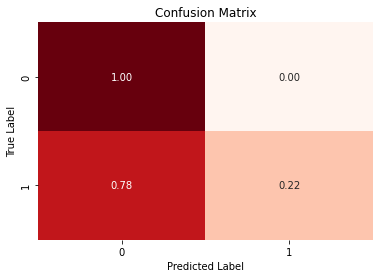

In [9]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


# Evaluate the model on the validation data
y_pred = model.predict(x_test)
#print('Training set score: {:.4f}'.format(model.score(x_train, y_train)))
#print('Test set score: {:.4f}'.format(model.score(x_test, y_test)))

y_pred_discrete = np.round(y_pred)
# Calculate the confusion matrix
conf_mat = confusion_matrix(y_test, y_pred_discrete)  # y_val이 ground truth

# Normalize the confusion matrix to get the ratios
conf_mat_norm = conf_mat / conf_mat.sum(axis=1, keepdims=True)

# Plot the normalized confusion matrix using Seaborn
sns.heatmap(conf_mat_norm, annot=True, fmt='.2f', cmap='Reds', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [25]:
from sklearn.metrics import classification_report
matrix = classification_report(y_test,y_pred_discrete )
print(matrix)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7499
           1       0.83      0.22      0.34        23

    accuracy                           1.00      7522
   macro avg       0.92      0.61      0.67      7522
weighted avg       1.00      1.00      1.00      7522



In [21]:
# f1 score
beta = 2
TN = conf_mat_norm[0][0]
FP = conf_mat_norm[0][1]
FN = conf_mat_norm[1][0]
TP = conf_mat_norm[1][1]
Precision = TP/(TP+FP)
Recall = TP/(TP+FN)

print("Pricision", Precision)
print('Recall', Recall)
print("F1", (1+beta**2)*(Precision*Recall)/((beta**2*Precision)+Recall))

Pricision 0.9993869609254225
Recall 0.21739130434782608
F1 0.25772380970710423


In [18]:
#x_train, x_test, y_train, y_test
del(x_train)
del(x_test)
del(y_train)
del(y_test)

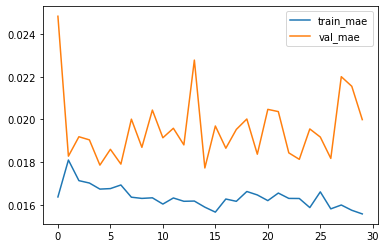

In [19]:
import matplotlib.pyplot as plt

plt.plot(history.history['mae'], label = 'train_mae')
plt.plot(history.history['val_mae'], label = 'val_mae')
plt.legend()

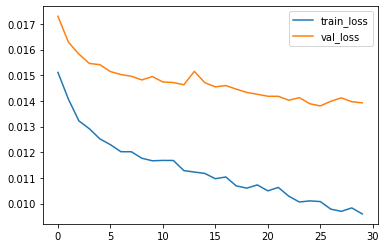

In [20]:
plt.plot(history.history['loss'], label = 'train_loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.legend()
     

In [21]:
!mkdir /content/drive/MyDrive/ai/dog/Mu02

In [22]:
model.save('/content/drive/MyDrive/ai/dog/Mu02')

# data 크기 줄이기
- 비정상 횟수에 맞게 줄이기
- 측면만 사용

In [ ]:
# 2시 팀미팅